# Problemas Numéricos: Mecânica Newtoniana
## FIS0615 - Mecânica Clássica I
### Docente: Prof. Dr. Edimilson alguma coisa
### Discente: Morgana Mendes Gomes, Paulo Henrique Cunha Pacheco, Wallysson Pereira da Silva, Ylana Karolina Santos Lopes
### 31/03/2025

### Índice:
- [1. Movimento horizontal de uma partícula sujeita a uma força variável no tempo.](#1.-Movimento-horizontal-de-uma-partícula-sujeita-a-uma-força-variável-no-tempo)

- [2. Movimento vertical com resistência de uma partícula.](#2.-Movimento-vertical-com-resistencia-de-uma-partícula)

- [3. Comparativo do movimento vertical de um objeto caindo sob ação de uma força linear e uma força quadrática.](#3.-Comparativo-do-movimento-vertical-de-um-objeto-caindo-sob-ação-de-uma-força-linear-e-uma-força-quadrática)

- [4. Movimento de projéteis.](#4.-Movimento-de-projéteis)

- [5. Energia potencial.](#5.-Energia-potencial)

- [6. Oscilador Harmônico Amortecido](#6.-Oscilador-Harmônico-Amortecido)

- [7. Movimento Subamortecido](#7.-Movimento-Subamortecido)

- [8. Oscilador Senoidal Impelido e Amortecido I](#8.-Oscilador-Senoidal-Impelido-e-Amortecido-I)

- [9. Oscilador Senoidal Impelido e Amortecido II](#9.-Oscilador-Senoidal-Impelido-e-Amortecido-II)

- [10. Oscilador Amortecido e a Função de Green.](#10.-Oscilador-Amortecido-e-a-Função-de-Green)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

### 1. Movimento horizontal de uma partícula sujeita a uma força variável no tempo

**Enunciado:** 

Uma partícula de massa 𝑚=1 kg está sujeita a uma força unidimensional $𝐹(𝑡)=𝑘𝑡𝑒^{−𝛼𝑡}$, onde 𝑘=1 N/s e 𝛼=0.5 s−1. Se a partícula estiver inicialmente em repouso, calcule e elabore um gráfico da posição, velocidade e aceleração da partícula como função do tempo.

___

**Solução analítica:** 

Aqui buscamos encontrar as relações que descrevem a posição, velocidade e aceleração como função do tempo partindo da expressão da força unidimensional que nos foi dada. Sabendo que $\vec F = m \vec a$, podemos isolar o $\vec a$ de forma que:

$$\vec a = \frac{\vec F}{m}$$

Assim, temos que a aceleração pode ser expressa por:


$$\boxed{\vec a(t) = \frac{1}{m}𝑘𝑡𝑒^{−𝛼𝑡}.} \tag{1.1}$$


Sabendo que $\vec a = d\vec v/ dt$, podemos integrar dos dois lados usando o método de substituição e integral por partes.

$$\int dv = \int \frac{1}{m}𝑘𝑡𝑒^{−𝛼𝑡} dt \implies v(t) = \frac{-k𝑒^{-\alpha𝑡}}{m\alpha^2}(\alpha t + 1) + C. $$

Em que $C$ é a constante de integração. Agora, vamos encontrar o valor de $C$ usando as condições iniciais do problema: $v(0) = 0$:

$$ v(0) = \frac{-k𝑒^{-\alpha \times 0}}{m\alpha^2}(\alpha \times 0 + 1) + C \implies 0 = \frac{-k}{m\alpha^2} + C   $$
$$ C = \frac{k}{m\alpha^2}.$$

Assim, encontramos a expressão para velocidade $v(t)$:

$$ v(t) = \frac{-k𝑒^{-\alpha𝑡}}{m\alpha^2}(\alpha t + 1) + \frac{k}{m\alpha^2} $$

$$ \boxed{v(t) = \frac{k}{m\alpha^2} [-e^{-\alpha𝑡}(\alpha t + 1) + 1].} \tag{1.2}$$

Analogamente, fazemos o mesmo processo para encontrar a expressão para a posição de uma partícula, sabendo que $\vec v = d\vec x/dt$. Pegamos a equação (1.2) e integramos mais uma vez.

$$ x(t) = \int v(t) dt$$

$$ x(t) = \int \frac{k}{m\alpha^2} [-e^{-\alpha𝑡}(\alpha t + 1) + 1] dt$$

Aqui podemos separar a integral em duas, em que a segunda parte é bem simples (as constantes de integração serão consideradas no final como uma única constante referente a soma das anteriores):

$$ x(t) =  \frac{k}{m\alpha^2} [\int -e^{-\alpha𝑡}(\alpha t + 1) dt +  \int 1 dt], \quad onde \quad  \int 1 dt = t$$

Agora vamos focar na primeira integral. Usando integração por partes encontramos:

$$ \int -e^{-\alpha𝑡}(\alpha t + 1) dt = te^{-\alpha t} + \frac{2}{a}e^{-\alpha t} = e^{-\alpha t}[t + \frac{2}{a}] $$

Somando as duas integrais na expressão originial de $x(t)$, encontramos a expressão abaixo. D é a constante de integração.

$$ x(t) =  \frac{k}{m\alpha^2} \left[te^{-\alpha t} +  t + \frac{2}{a} e^{-\alpha t} \right] + D $$

Com as condições iniciais, encontramos $D$ aplicando $x(0) = 0$ na expressão anterior.

$$ x(0) = \frac{k}{m\alpha^2} \left[0 \times e^{-\alpha \times 0} +  0 + \frac{2}{a} e^{-\alpha \times 0} \right] + D $$

$$ 0 = \frac{k}{m\alpha^2}  \frac{2}{a} + D \implies D = -\frac{2k}{m \alpha^3}$$

Dessa forma, manipulamos um pouco os termos e agrupando os iguais:

$$x(t) =  \frac{k}{m\alpha^2} \left[te^{-\alpha t} +  t + \frac{2}{a} e^{-\alpha t} \right] -\frac{2k}{m \alpha^3} $$

$$x(t) =  \frac{k}{m\alpha^2} \left[ te^{-\alpha t} +  t + \frac{2}{a} e^{-\alpha t} -\frac{2}{\alpha} \right]$$

Por fim, encontramos a expressão final que descreve a posição em função do tempo.

$$ \boxed{ x(t) = \frac{k}{m \alpha^2} \left[ t (1 + e^{-\alpha t}) + \frac{2}{\alpha} (e^{-\alpha t} - 1) \right]}  \tag{1.3}$$

In [2]:
# Definindo as funções que encontramos analiticamente.

def f(t):
    return k*t*np.exp(-alpha*t)

def v(t):
    return ( k/( m*alpha**2 ))*( -np.exp(-alpha * t) * (alpha * t + 1) + 1) 

def x(t):
     return (k / (m * alpha**2)) * (t * (1 + np.exp(-alpha * t)) + (2 / alpha) * (np.exp(-alpha * t) - 1))

In [11]:
t = np.linspace(0,10,100)
m = 1 # kg
k = 1 # N/s
alpha = 0.5 # s^-1
v0 = 0

a = f(t)/m # usando lei de newton f = ma

v_t = v(t)  # Velocidade
x_t = x(t)  # Posição

Text(0, 0.5, 'Aceleração $(m/s^2)$')

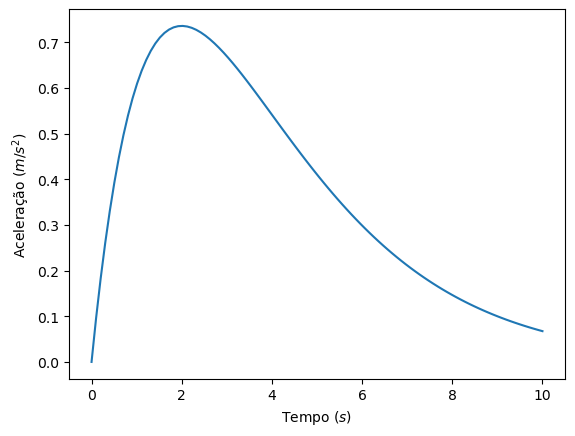

In [12]:
# Aceleração

plt.plot(t, a)
plt.xlabel("Tempo $(s)$")
plt.ylabel(r"Aceleração $(m/s^2)$")

Text(0, 0.5, 'Velocidade $(m/s)$')

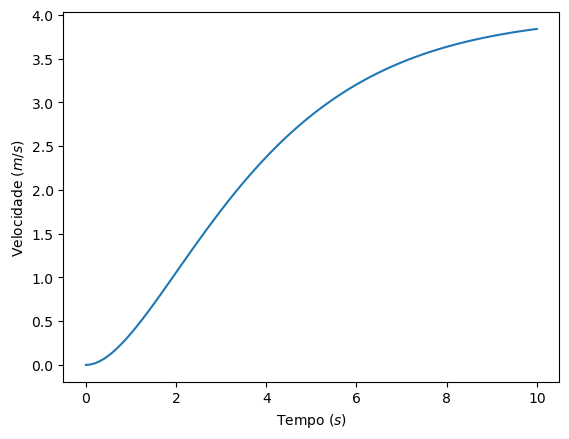

In [13]:
# Velocidade

plt.plot(t, v_t)
plt.xlabel("Tempo $(s)$")
plt.ylabel(r"Velocidade $(m/s)$")

Text(0, 0.5, 'Posição $(m)$')

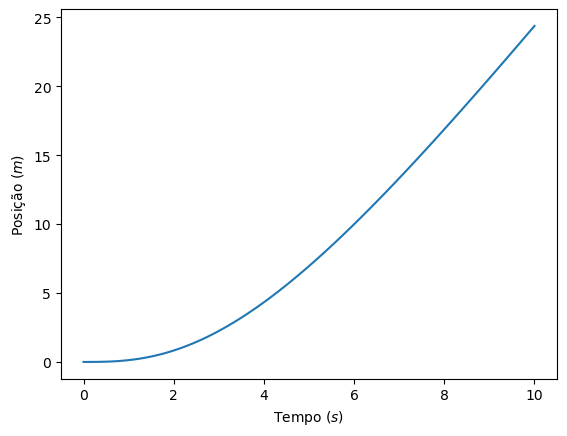

In [14]:
# Posição

plt.plot(t, x_t)
plt.xlabel("Tempo $(s)$")
plt.ylabel(r"Posição $(m)$")

**Comentário final:** Aqui partimos da segunda lei de Newton para encontrar as expressões da velocidade e posição da partícula. Como nos foi dada a expressão da força, derivamos duas vezes encontrando as relações buscadas. No intervalo de tempo escolhido, podemos comparar o comportamente do gráficos. Podemos perceber que a aceleração não é constante, o que se transmite nos gráficos de posição e velocidade. Também podemos traçar o paralelo entre o pico da aceleração e a força no seu ponto máximo que são os mesmos devido a segunda lei de Newton. Aumentando o intervalo de tempo, é possível ver que a aceleração zera, tornando a velocidade constante e consequentemente o gráfico de posição como uma reta. Podemos entender esse movimento como a força atuando sobre um corpo para iniciar o movimento e depois parando, de forma que o movimento se aproxima de um movimento retilíneo uniforme no final.

### 2. Movimento vertical com resistência de uma partícula

**Enunciado:** Uma partícula de massa 𝑚 está submetida ao movimento vertical em um determinado meio com uma força de retardo proporcional a velocidade.

(a) Determine o deslocamento e a velocidade de movimento vertical da partícula.

(b) Elabore gráficos de 𝑦(𝑡) para $𝑣_0 = 0,|𝑣⃗_0|<|𝑣⃗_𝑡| e |𝑣⃗_0|>|𝑣⃗_𝑡|$, onde $𝑣⃗_𝑡$ é a velocidade terminal.

(c) Elabore gráficos de 𝑣(𝑡) para $𝑣_0 = 0,|𝑣⃗_0|<|𝑣⃗_𝑡| e |𝑣⃗_0|>|𝑣⃗_𝑡|$, onde $𝑣⃗_𝑡$ é a velocidade terminal.

---

**Solução analítica:** 


#### a) 

#### Parte A: Encontrar a função velocidade

Considerando o movimento vertical com a única força atuando no corpo seja a gravitacional, temos a força de retardo e a gravitacional sendo:

$$F_r = - kv(t), \quad F_g = mg.$$
$$\vec F = m \vec a = mg - kmv.$$

Em que consideramos o sentido positivo como sendo para baixo. Assim, isolamos o $\vec a$ encontramos:

$$ \vec a (t) = g - kv \tag{2.1} $$

Como sabemos que $\vec a = d\vec v/dt$, podemos encontrar a equação diferencial da forma de (2):

$$ \frac{dv}{dt} = g - kv, $$
$$ \frac{dv}{dt} - kv = g. \tag{2.2}$$

Multiplicamos ambos os lados da equação, usando o fator de integração $\mu (t) = e^{\int kdt} = e^{kt}$ para encontrar uma forma que lembra a forma de uma regra do produto.

$$ \mu(t) \frac{dv}{dt} - \mu(t) kv = \mu(t) g.$$
$$\frac{d}{dt}(\mu \cdot v) = \mu g$$

Integrando dos dois lados em $t$:

$$\mu \cdot v = \int \mu(t) g dt = \int g e^{kt} dt$$ 

$$ v e^{kt} = \frac{g}{k} e^{kt} + C$$

Assim, encontramos a expressão para a velocidade. 

$$v(t) = \frac{g}{k} + Ce^{-kt}$$

Fazendo $t = 0$, podemos encontrar o valor de $C$:

$$v(0) = v_0 = \frac{g}{k} + C  ⟶  C = v_0 - \frac{g}{k}$$

De forma que encontramos a função da velocidade como sendo finalmente:

$$ \boxed{v(t) = \frac{g}{k} + \left(v_0 - \frac{g}{k} \right)e^{-kt}} \tag{2.3}$$




In [7]:
# Definimos a função velocidade

def v_func(t, v0):
    return g/k + (v0 - (g/k))*np.exp(-k*t)

#### Parte B:  Encontrar função deslocamento

Tendo a expressão $v(t)$, fazemos o mesmo que nos passos anteriores e integraremos:

$$ y(t) = \int v(t) dt $$

$$ y(t) = \int \frac{g}{k} + \left(v_0 - \frac{g}{k} \right)e^{-kt} dt $$

Podemos separar esta integral em 2, mais uma vez as constantes de integração serão adicionadas no final em um termo só:

$$ y(t) = \int \frac{g}{k} dt + \int \left(v_0 - \frac{g}{k} \right)e^{-kt} dt, \quad onde \quad \int \frac{g}{k} dt = \frac{g}{k}t \tag{2.4}$$

A segunda integral também é simples, de forma que temos:

$$ \int \left(v_0 - \frac{g}{k} \right)e^{-kt} dt = -\frac{1}{k}e^{-kt}\left( v_0 - \frac{g}{k} \right) $$

Somando as duas de volta na expressão (2.1), encontramos:

$$ y(t) = \frac{g}{k}t -\frac{1}{k}e^{-kt}\left( v_0 - \frac{g}{k} \right) + C'$$

Com isso, é necessário encontrar o valor da constante de integração $C'$ usando as condições iniciais. Vamos considerar $y(0) = y_0 = 0$ e substituir acima. Como queremos o deslocamento, e não só a posição da parícula, podemos escolher nosso zero arbritariamente.

$$ y(0) = \frac{g}{k}\times 0 -\frac{1}{k}e^{-k\times 0}\left( v_0 - \frac{g}{k} \right) + C' \implies C' = \frac{1}{k}\left( v_0 - \frac{g}{k}\right) $$


Com isso, manipulando um pouco os termos, encontramos a expressão para o deslocamento vertical.


$$ \boxed{ y(t) = \frac{1}{k} \left[ gt + ( v_0 - g/k)( 1 - e^{-kt} ) \right]. } \tag{2.5} $$


In [8]:
# Definimos a função deslocamento.

def y_func(t, v0):
    return (1 / k) * (g * t + (v0 - g / k) * (1 - np.exp(-k * t)))

#### b) 

Inicialmente, com as funções já definidas, vamos definir as constantes e velocidades iniciais que trataremos aqui.

In [15]:
g = 9.81 #m/s^2
k = 1 # Constante
vt = g/k  # quando consideramos o t tendendo ao infinito.
t = np.linspace(0,10,100)

v0 = [0, 0.5*vt,  1.5 * vt]
label_list = [r'$V_0 = 0$', '$V_0 = 0.5 V_t$', '$V_0 = 1.5 V_t$']


Text(0, 0.5, 'Deslocamento $(m)$')

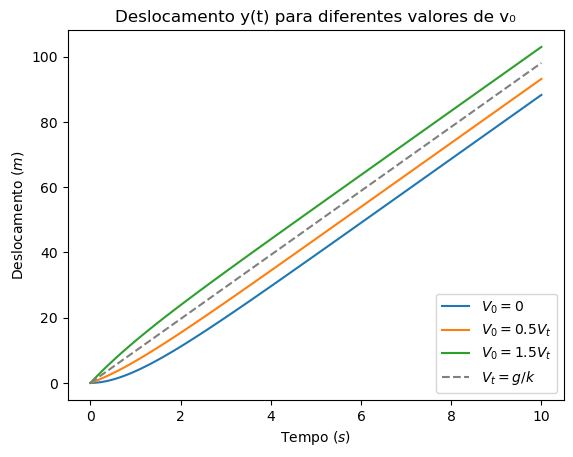

In [16]:
# Plotando o gráfico para o deslocamento temos:

for i in range(0,len(v0)):
    y = y_func(t, v0[i]) 
    plt.plot(t, y, label = label_list[i])

plt.plot(t, y_func(t, vt), c = 'gray', ls = '--', label = '$V_t = g/k$')
plt.legend(loc = 'lower right')
plt.title("Deslocamento y(t) para diferentes valores de v₀")
plt.xlabel("Tempo $(s)$")
plt.ylabel("Deslocamento $(m)$")

#### c) 

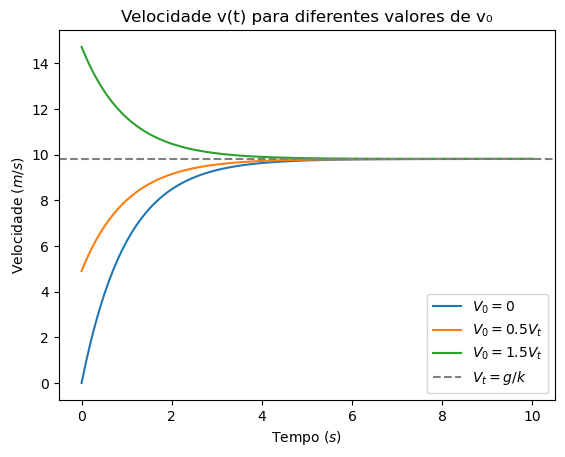

In [17]:
# Plotando o gráfico de v(t) 

for i in range(0,len(v0)):
    v = v_func(t, v0[i]) 
    plt.plot(t, v, label = label_list[i])
    
plt.axhline(vt, color='gray', linestyle='--', label=r"$V_t = g/k$")

plt.title("Velocidade v(t) para diferentes valores de v₀")
plt.xlabel("Tempo $(s)$")
plt.ylabel("Velocidade $(m/s)$")
plt.legend(loc = 'lower right')

**Comentário final:** Nesta questão, exploramos o movimento vertical com uma resistência linear (que será útil na próxima questão), encontrando as expressões para velocidade e deslocamento desse sistema. O ponto central que foi possível observar nos gráficos elaborados neste problema foi a relação entre a velocidade inicial $V_0$ e a velocidade terminal $V_t$ do sistema. Graficamente é notório que a velocidade da partícula sempre tende para a velocidade terminal com o passar do tempo, independente da velocidade inicial. Ou seja, se você se joga de um prédio com uma velocidade maior que a terminal, o senhor irá **desacelerar** até chegar em $V_t$ (ou no chão).
Já no gráfico do deslocamento, vemos que o deslocamento começa meio curvo e se torna uma reta, indicando o que discutimos anteriormente.

### 3. Comparativo do movimento vertical de um objeto caindo sob ação de uma força linear e uma força quadrática

**Enunciado:**

(a) Faça gráficos comparativos da velocidade terminal do movimento vertical de queda para um objeto sob ação de uma força linear e uma força quadrática para as condições iniciais $𝑡_0=0$, $𝑥_0=0$ e $𝑣_0=0$. 

(b) Em determinado intervalo de tempo, qual objeto percorrerá uma distância maior, e por quê?

(c) Para os objetos que caem verticalmente, qual das duas situações é mais desejável e por quê?

(d) O que indicam os valores de 𝑣1 e 𝑣2 no tempo 𝑡 =20 e 30?

___

**Solução analítica:**

Vamos considerar $\vec F = -k \vec v$ (força linear) e $\vec F = -k \vec v^2$ (força quadrática). 

**(a)** Para o gráfico da força linear, usaremos o mesmo desenvolvimento apresentado na [questão 2](#2.-Movimento-vertical-com-resistência-de-uma-partícula.). Onde encontramos a função da velocidade como sendo:

$$v(t) = \frac{g}{k} + (v_0 - \frac{g}{k})e^{-kt}.$$


Com isso, podemos focar na equação de movimento da força quadrática. Fazendo um processo análogo ao da questão anterior:

$$F_r = - kv(t)^2, \quad F_g = mg.$$
$$\vec F = m \vec a = mg - kmv^2.$$

Em que consideramos o sentido positivo como sendo para baixo. Assim, isolamos o $\vec a$ encontramos:

$$ \vec a (t) = g - kv^2 \tag{1} $$

Como sabemos que $\vec a = d\vec v/dt$, podemos encontrar a equação diferencial da forma de (2):

$$ \frac{dv}{dt} = g - kv^2, $$
$$ \frac{dv}{dt} - kv^2 = g. \tag{2}$$

Aqui, podemos separar as variáveis dependentes de $v$ para um lado e as de $t$ para o outro de forma que temos:

$$\frac{dv}{g + kv^2} = dt$$

Integrando dos dois lados encontramos, em que chamamos $\alpha = k/g$:

$$\int \frac{dv}{g + kv^2} = \int dt$$

$$\frac{1}{g} \int \frac{dv}{1 + \alpha v^2} = \int dt$$

Com isso, vemos que a integral do termo da esquerda é uma integral tabelada que retorna:

$$\int \frac{dv}{1 + \alpha v^2} = \frac{1}{\alpha} \tanh^{-1}(\alpha v) + C$$

Substituindo na expressão anterior, temos que a solução 



Encontramos a solução final:

$$ \boxed{v(t) = \sqrt{\frac{mg}{k}} \tanh(\sqrt{\frac{kg}{m}} t)}$$

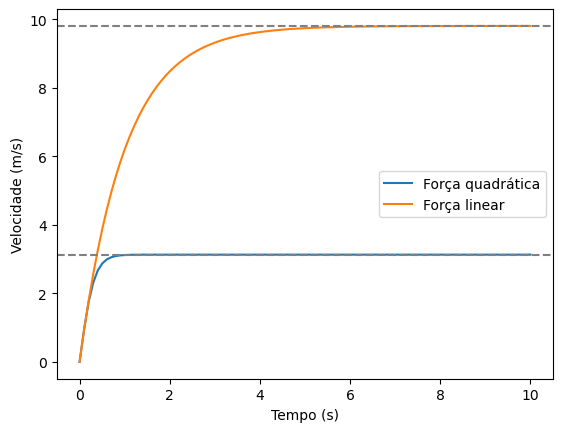

In [18]:
def v_lin(t, v0):
    return g/k + (v0 - (g/k))*np.exp(-k*t)

def v_quad(t):
    return np.sqrt((m * g) / k) * np.tanh(np.sqrt((k * g) / m) * t)  ## já considera v0 = 0

plt.plot(t, v_quad(t), label = "Força quadrática")
plt.plot(t, v_lin(t, 0), label = "Força linear")

plt.xlabel("Tempo (s)")
plt.ylabel("Velocidade (m/s)")
plt.axhline(g/k,  ls = '--', color = 'gray') # Velocidade limite para F linear
plt.axhline(np.sqrt(m*g/k), ls = '--', color = 'gray') # Velocidade limite para F quadrática

plt.legend(loc = 'center right')

#### b) Qual percorre uma distância maior

Analizando as duas curvas, vemos que a velocidade terminal (valor em que a velocidade se torna constante) é maior para a força linear do que para a quadrática. Este é o primeiro indicativo que o sistema com resistência linear percorrera um distância maior em um mesmo intervalo de tempo. Nos primeiros instantes, a velocidade da partícula evolui da mesma maneira até chegar perto da velocidade limite da força quadrática. Nesse ponto, o comportamento das velocidades divergem e o sistema com resistência linear continua aumentando, enquanto a quadrática estabiliza. De maneira mais objetiva, podemos ver graficamente a integral da velocidade - que condiz com o deslocamento. Fica claro que a área embaixo da curva da resistência linear é bem maior que a da resistência quadrática, o que faz sentido já que alcança uma velocidade maior.


#### c) Qual situação é mais desejável

Depende do que se tem como objetivo ao deixar um objeto cair verticalmente. Imaginando que queremos manter a integridade do corpo mesmo após a queda - no caso de uma pessoa - a situação com resistência quadrática é mais desejável por ter a velocidade terminal mais baixa. Porém, se o objetivo do objeto é cair mais rápido, a situação com resistência linear é mais eficiente nesse ponto já que a velocidade terminal é maior, alcançando velocidades bem maiores que o caso quadrático.


#### d) O que indicam $v_1$ e $v_2$ em $t = 20 s$ e $30s$

Nos momentos citados acima, ambas as velocidades já alcançaram a velocidade terminal dos seus respectivos sistemas. Podemos esperar que os valores da velocidade sejam praticamente iguais nesses dois pontos. E é o que acontece como mostrado abaixo, comparando os valores da velocidade de cada sistema nos dois momentos, junto com a velocidade terminal esperada dos cálculos - obtida com $t \to \infty$ nas expressões de $v(t)$.

Para a velocidade terminal linear:

$$\boxed{V_{tl} = \frac{g}{k}.} $$


E para a velocidade terminal quadrática:

$$ \boxed{V_{tq} =  \sqrt{\frac{mg}{k}}. }$$

Ou seja, a velocidade nesses pontos nos diz a velocidade terminal de cada sistema.

In [19]:
data = {
    "20s": [v_lin(20,0), v_quad(20)],
    "30s": [v_lin(30,0), v_quad(30)],
    "v_t (Calculada)": [g/k, np.sqrt(m*g/k)]
}

index = ["v1 (linear)", "v2 (quadrática)"]

df = pd.DataFrame(data, index=index)

df

,20s,30s,v_t (Calculada)
v1 (linear),9.810000,9.810000,9.810000
v2 (quadrática),3.132092,3.132092,3.132092


**Comentário final:** Nessa questão comparamos o movimento vertical de um objeto em dois regimes diferentes. Um sob a ação de uma força resistiva linear e uma força resistiva quadrática. Aqui encontramos analiticamente as expressões de velocidade em função do tempo para os dois regimes, a partir do qual geramos um gráfico. A partir deste gráfico, fomos capazes de visualizar a evolução do comportamento das velocidades, vendo que alcançam um valor constante depois de um tempo - a velocidade terminal. Também foi observado que o regime da força quadrática tem uma velocidade terminal bem menor que o linear, o que era esperado já que a força quadrática teria um valor maior, logo uma resistência maior se opõe ao movimento. Por fim, encontramos os valores das velocidades terminais considerando $t \to \infty$ e condizem com o observado graficamente.

### 4. Movimento de projéteis.

---

**Enunciado:**

**Movimento de Projéteis.** Considere o movimento de um projétil em duas dimensões com velocidade inicial $v_0 $ e ângulo de inclinação $\theta $.

(a) Calcule o deslocamento $y(t) $, a velocidade $ v(t) $ e o alcance do projétil sem considerar o efeito resistivo do ar.

(b) Calcule o deslocamento, a velocidade e a redução do alcance do projétil devido à ação de uma força resistiva provocada pela resistência do ar, diretamente proporcional à velocidade do projétil.

(c) Considerando os resultados anteriores, faça gráficos da altura vertical em função do alcance para diferentes valores da constante da força de retardo (k = 0, 0.005, 0.01, 0.02, 0.04, 0.06, 0.08 e 0.1).

(d) Considerando os resultados anteriores, faça gráficos do alcance em função dos diferentes valores da constante da força de retardo (k = 0, 0.005, 0.01, 0.02, 0.04, 0.06, 0.08 e 0.1).

---

**Item a)**
 
 $\quad$ Como estamos desconsiderando o efeito resistivo do ar, a única força agindo no corpo será a gravitacional. Assim, pela Segunda Lei de Newton, teremos que 
 
 $$ \vec{P} = m\vec{a}.$$
 
 Onde podemos descrever o movimento de maneira independente nos eixos $y$ e $x$. Para o eixo $x$:
 
 $$ \vec{P}_x = m\vec{a}_{x} \implies 0 = m a_x \implies m\frac{d^2x}{dt^2} = 0 \implies \frac{d^2x}{dt^2} = 0 \implies \frac{d}{dt}\left( \frac{dx}{dt}\right) = 0 \implies \frac{dx}{dt} = cte = v_x$$
 
 Assim, obtemos que a velocidade é constante para o movimento horintal do projétil, com a função horária da posição sendo obtida ao integrar a expressão acima, ou seja
 
 $$ \boxed{x(t) = x_0 + v_xt}, \tag{4.1}$$
 
 onde $x_0$ é a posição inicial do projétil.
 
 $\quad$ Para o eixo $y$:
 
 $$ \vec{P}_y = m\vec{a}_y \implies -mg = ma_y \implies \frac{d^2y}{dt^2} = -g \implies \frac{d}{dt} \left( \frac{dy}{dt}\right) = -g \implies \frac{dv_y}{dt} = -g \implies dv_y = -gdt$$
 
 Podemos integrar a expressão e obter:
 
 $$ \int_{v_{0y}}^{v_y} dv_y^{\prime} = - \int_{t_0=0}^{t} gdt^{\prime} \implies v_y - v_{0y} = -gt \implies \boxed{v_y = v_{0y} - gt}. \tag{4.2}$$
 
 Mas podemos ressaltar o fato de que $v_y = \frac{dy}{dt}$, obtendo
 
 $$ \frac{dy}{dt} = v_{0y} - gt \implies dy = \left( v_{0y} - gt\right)dt \implies \int_{y_0}^{y} dy^{\prime} = \int_{t_0 = 0}^{t} \left( v_{0y} -gt\right)dt^{\prime}$$
 
 $$ \implies y - y_0 = v_{0y}t - g\frac{t^2}{2} \implies \boxed{y_{(t)} = y_0 + v_{0y}t - g\frac{t^2}{2}}. \tag{4.3}$$
 
 A partir dessa expressão $y(t)$, podemos obter a expressão $y(x)$. A partir de (4.1), obtemos que
 
 $$ x - x_0 = v_xt \implies t = \frac{x-x_0}{v_x}.$$
 
 Substituindo esse valor na expressão de (4.2):
 
 $$y(x) = y_0 + v_{0y} \frac{\left(x-x_0\right)}{v_x} - \frac{g}{2} \left( \frac{\left( x-x_0\right)}{v_x}\right)^2.$$
 
 Vamos adotar um referencial tal que $x_0 = 0$ e $y_0 = 0$, assim
 
$$ y(x) =\frac{v_{0y}}{v_x} x - \frac{g}{2} \frac{x^2}{v_x^2}.$$
 
 Agora, como o lançamento é inicial com velocidade $v_0$ e formando um angulo $\theta$ com i semieixo positivo de x, teremos as relações
 
 $$ v_{0x} = v_x = v_0 \cos{\theta} \ \text{ e } \ v_{0y} = v_0\sin{\theta}.$$
 
 Utilizando essas relações em (4.3):
 
 $$ y(x) = \frac{v_0 \sin{\theta}}{v_0\cos{\theta}}x - \frac{g}{2} \frac{x^2}{v_0^2\cos^2{\theta}} = $$
 
 Para obtermos o alcance máximo do projétil, temos que obter o $x$ tal que $y(x)$ será igual a zero. Isso acontece no início da trajetória ($x=0$) e no local de alcance máximo do projétil. Logo, temos que determinar o $x$ tal que $y(x) = 0$. Ou seja
 
 $$ x\tan{\theta} - \frac{g}{2v_0^2\cos^2{\theta}}x^2 = 0.$$
 
 Utilizando a Eq. de Baskara para $a = -\frac{g}{2v_0^{2}\cos^2{\theta}}$, $b = \tan{\theta}$ e $c = 0$:
 
 $$ x_{max} = \frac{-\tan{\theta} \pm \sqrt{\tan^2{\theta}}}{2a}$$ 
 
 Se adotarmos o sinal positivo, $x$ será a solução trivial. Então, vamos adotar a solução com a subtração, obtendo
 
 $$ x_{max} = \frac{-2\tan{\theta}}{-2 \frac{g}{2v_0^2 \cos^2{\theta}}} = \frac{2\tan{\theta} v_0^2\cos^2{\theta}}{g} \implies {x_{max} = \frac{2v_0^2 \sin{\theta} \cos{\theta}}{g}}. $$
 
 
 E então, simplificando, temos o alcance máximo sem a resistência do ar:
 
 $$ x_{max} = \frac{v_0^2 \sin{\theta} 2\cos{\theta}}{g} \implies \boxed{\frac{v_0^2\sin{2\theta}}{g}}. $$
 

**Item b)**

Agora iremos considerar que o corpo, além de estar exposto à força gravitacional, também estará sofrendo a ação de uma força de retardo proporcional à sua velocidade $v$. Assim, a Segunda Lei de Newton para o projétil fica com a seguinte forma

$$ \vec{P} + f(v)\left(-\hat{v}\right) = m\vec{a} \implies \vec{P} - f(v) \hat{v} = m\vec{a}$$

Como a força de retardo é proporcional à velocidade, podemos escrevê-la como $f(v) = bv$. Resultando em 

$$\vec{P} - bv\hat{v} = m\vec{a} \implies \vec{P} - b \vec{v} = m\vec{a}$$

Em x:

$$ -kv_x = ma_x \implies m\frac{dv_x}{dt} = -kv_x \implies \frac{dv_x}{v_x} = -\frac{b}{m}dt$$

Chamando $\frac{b}{m} = k$, e integrando a expressão:

$$ \int_{v_{x0}}^{v_x} \frac{dv_x^{\prime}}{v_x^{\prime}} = \int_{t_0 = 0}^{t} -k dt^{\prime} \implies ln(v_x^{\prime})_{v_{x0}}^{v_x} = -kt \implies ln(v_x) - ln(v_{x0}) = -kt$$

$$ \implies ln\left( \frac{v_x}{v_{x0}}\right) = -kt \implies \frac{v_x}{v_{x0}} = e^{-kt} \implies v_x(t) = v_{x0}e^{-kt}.$$

Nesse ponto é coveniente definir $\tau = \frac{1}{k} = \frac{m}{b}$, onde tal parâmetro tem dimensão de tempo. Assim, teremos

$$ \boxed{v_x(t) = v_{x0}e^{-\frac{t}{\tau}}}. \tag{4.5}$$

Agora podemos integrar a Equação para obter a função horária para a posição $x(t)$

$$ \frac{dx}{dt} = v_{x0}e^{-\frac{t}{\tau}} \implies dx = v_{x0}e^{-\frac{t}{\tau}} dt \implies \int_{x_0=0}^{x} dx^{\prime} = \int_{t_0=0}^{t} v_{x0}e^{-\frac{t^{\prime}}{\tau}} dt^{\prime}$$

$$ \implies x(t) = v_{x0} \int_{0}^{t}e^{-\frac{t^{\prime}}{\tau}}dt^{\prime} = v_{x0} \left(\frac{e^{-\frac{t^{\prime}}{\tau}}}{-\frac{1}{\tau}}\right)_{0}^{t} = -v_{x0}\tau \left( e^{-\frac{t}{\tau}} - e^{0}\right) \implies \boxed{x_0 = v_{0x}\tau \left( 1- e^{-\frac{t}{\tau}}\right)}. \tag{4.6}$$

Em y:

Assumindo um eixo vertical cujos valores positivos apontam para cima, desenvolvemos a expressão

$$ \vec{P} - b \vec{v} = m\vec{a} \implies -mg - bv_y = ma_y \implies a_y = -g - \frac{b}{m}v_y\tag{4.7}$$

$$ \implies \frac{dv_y}{dt} = -g-\frac{b}{m}v_y \implies  dv_y = \left( -g- \frac{b}{m}v_y\right)dt = \left( g+ \frac{b}{m}v_y\right)(-dt) \implies \frac{dv_y}{\left( g+ \frac{b}{m}v_y\right)} = -dt$$

Novamente chamando $\frac{b}{m} = k$

$$ \frac{dv_y}{g+kv_y} = -dt \implies \int_{v_0y}^{v_y} \frac{dv_y^{\prime}}{g+kv_y^{\prime}}dv_y^{\prime} = \int_{t_0 = 0}^{t} dt^{\prime}$$

No caso da integral indefinida $\int \frac{dv_y^{\prime}}{g+kv_y^{\prime}}dv_y^{\prime}$, podemos fazer $u = g+kv_y^{\prime} (\implies du = kdv_y^{\prime})$, para obter a primitida:

$$ \int \frac{dv_y^{\prime}}{g+kv_y^{\prime}}dv_y^{\prime} = \int \frac{1}{u}\frac{du}{k} = \frac{1}{k}\ln{u} + C\implies \int \frac{dv_y^{\prime}}{g+kv_y^{\prime}}dv_y^{\prime} = \frac{1}{k}\ln{(g+kv_y^{\prime})} + C.$$

Assim

$$ \frac{1}{k}ln{(g+kv_y^{\prime})}|_{v_{0y}}^{v_y} = -t \implies \ln{(g+kv_y)} - \ln{(g+kv_{0y})} = -kt \implies \ln{\left(\frac{g+kv_y}{g+kv_{0y}}\right)} = -kt \implies \left(\frac{g+kv_y}{g+kv_{0y}}\right) = e^{-kt}$$

$$ g + kv_y = (g+kv_{0y})e^{-kt} \implies \boxed{v_y = - \frac{g}{k} +\frac{1}{k}(g+kv_{0y})e^{-kt}} \tag{4.8}$$

Agora integrando para achar $y(t)$

$$ \frac{dy}{dt} = - \frac{g}{k} +\frac{1}{k}(g+kv_{0y})e^{-kt} \implies \int_{y_0 = 0}^{y} dy^{\prime} = \int_{t_0 = 0}^{t} \left(\frac{g}{k} +\frac{1}{k}(g+kv_{0y})e^{-kt^{\prime}}\right)dt^{\prime}$$

$$ \implies y^{\prime}|_{0}^{y} = \frac{g}{k}t^{\prime}|_{0}^{t} + \frac{1}{k}(g+kv_{0y})\int_{0}^{t} e^{-kt^{\prime}}dt^{\prime} \implies y = \frac{g}{k}t + \frac{1}{k}\left(g + kv_{0y}\right) \left(\frac{e^{-kt^{\prime}}}{-k}\right)_{0}^{t} = \frac{g}{k}t -  \frac{1}{k}\left( \frac{g}{k}+ v_{0y}\right)\left(e^{-kt} - e^{0}\right)$$

$$ \implies y(t) = \frac{g}{k}t - \frac{1}{k} \left(\frac{g}{k} + v_{0y}\right)(e^{-kt} - 1) \therefore \boxed{y(t) = \frac{g}{k}t + \frac{1}{k}\left(\frac{g}{k} + v_{0y}\right)\left(1-e^{-kt}\right)} \tag{4.9}$$

A partir de (4.7), podemos definir uma velocidade terminal, que acontece quando a aceleração é nula $\dot{v_y} = 0$, como $v_{ter} = -\frac{mg}{b} = -\frac{g}{k}.$ Assim, as duas últimas equações se tornam


$$\boxed{v_y = -v_{ter} + (v_{ter} - v_{0y})e^{-kt}} \text{  e  } \boxed{y(t) = v_{ter}t\frac{1}{k}(v_{ter}-v_{0y})(1-e^{-kt})}.$$


---

**Tempo de Voo ($ t_{\text{total}} $)**  

Igualando $ y(t) = 0 $ e expandindo termos simplificados na passagem anterior:  

$$
\frac{m g}{b}\,t + \frac{m}{b}\biggl(\frac{m g}{b} + v_0 \sin\theta\biggr)\bigl(1 - e^{-\,\frac{b}{m}t}\bigr) = 0.
$$


Fatorando $\tfrac{m}{b}$, obtemos:
$$
\frac{m}{b}\Bigl(g\,t + \bigl(\tfrac{m g}{b}+v_0\sin\theta\bigr)\,(1-e^{-\,\frac{b}{m}t})\Bigr)=0
\quad\Longrightarrow\quad
g\,t + \Bigl(\tfrac{m g}{b}+v_0\sin\theta\Bigr)\Bigl(1-e^{-\,\frac{b}{m}t}\Bigr)=0.
$$


Expansão em série de $e^{-x}$

Para $x = \tfrac{b}{m}t$ pequeno:

$$
e^{-x} = 1 - x + \frac{x^2}{2} - \cdots
\quad\Longrightarrow\quad
1 - e^{-x} = x - \frac{x^2}{2} + \mathcal{O}(x^3).
$$

Substituindo $x = \tfrac{b}{m}t$:

$$
1 - e^{-\frac{b}{m}t}
\approx
\frac{b}{m}\,t
- \frac{1}{2}\Bigl(\frac{b}{m}t\Bigr)^2.
$$

Substituindo na equação de partida:

$$
g\,t 
+ \Bigl(\tfrac{m g}{b}+v_0\sin\theta\Bigr)\Bigl(\frac{b}{m}t - \frac12\frac{b^2}{m^2}t^2\Bigr)
=0.
$$

Multiplicando por $m$ para simplificar:

$$
m\,g\,t 
+ \Bigl(\tfrac{m g}{b}+v_0\sin\theta\Bigr)\Bigl(b\,t - \tfrac12\frac{b^2}{m}t^2\Bigr)
=0.
$$

Voltando a dividir por $m$ e escrevendo $A = \tfrac{g}{b}+v_0\sin\theta$, temos

$$
g\,t + A\bigl(b\,t - \tfrac12 b^2 t^2\bigr) = 0.
$$


Resolvendo a quadrática e expandindo em $b$

$$
-\tfrac12 A b^2\,t^2 + (g + A b)\,t = 0,
$$

a raiz $t\neq0$ é

$$
t = \frac{g + A b}{\tfrac12 A b^2}\,\times 2/b
= \frac{2}{b}\,\frac{g + A b}{A}.
$$

Substituindo $A = \tfrac{g}{b}+v_0\sin\theta$ e expandindo até ordem 1 em $b$:

$$
t_{\rm total}
\approx \frac{2\,v_0\sin\theta}{g}
\Bigl(1 - \frac{b\,v_0\sin\theta}{g}\Bigr).
\tag{4.10}$$ 

**Alcance com Resistência ($ R' $)**  
Substituindo $ t_{\text{total}} $ na equação (4.6):  
$$
x_0 = R' = \frac{v_0 \cos\theta}{b} \left(1 - e^{-b t_{\text{total}}}\right).
$$  
Aproximando $ e^{-b t_{\text{total}}} \approx 1 - b t_{\text{total}} + \frac{(b t_{\text{total}})^2}{2} $:  
$$
R' \approx v_0 \cos\theta \cdot t_{\text{total}} \left(1 - \frac{b t_{\text{total}}}{2}\right).
$$  
Substituindo $ t_{\text{total}} $:  
$$
R' \approx \frac{v_0^2 \sin 2\theta}{g} \left(1 - \frac{4b v_0 \sin\theta}{3g}\right).
$$  

---

**Redução do Alcance ($ \Delta R $)**  
Comparando com o alcance sem resistência ($ R = \frac{v_0^2 \sin 2\theta}{g} $):  
$$
\Delta R = R - R' \approx \frac{4b v_0^3 \sin\theta \sin 2\theta}{3g^2}.
$$  

**Resposta Final:**  
$$
\boxed{\Delta R = \frac{4b v_0^3 \sin\theta \sin 2\theta}{3g^2} = R(\frac{4b v_0 sen\theta}{3g})}.
$$  


O alcance R' será menor que R devido a resistência, logo o $\Delta R$ é positivo.

**Item c)**

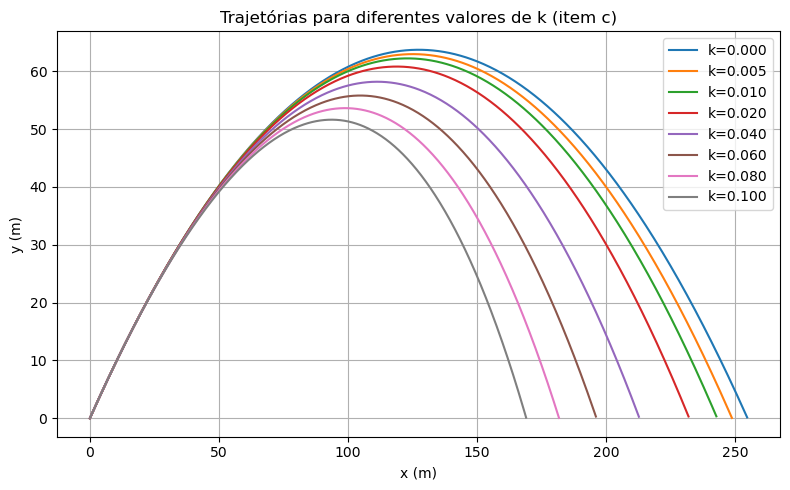

In [2]:
#parâmetros
m    = 1.0              
v0   = 50.0              
theta= 45.0              
g    = 9.81

theta_rad = np.deg2rad(theta)
v0x = v0 * np.cos(theta_rad)
v0y = v0 * np.sin(theta_rad)

K = np.array([0.0, 0.005, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1])

#definindo tempos
t_min, t_max, N = 0.0, 20.0, 2000
t = np.linspace(t_min, t_max, N)

R0 = 2*v0y/g * v0x

#definindo as trajetórias  com e sem resistência
def traj(t, k):
    if k == 0:
        x = v0x * t
        y = v0y * t - 0.5*g*t**2
    else:
        #expressões com resistência
        b = k/m
        x = (v0x/b)*(1 - np.exp(-b*t))
        y = (1/b)*((v0y + g/b)*(1 - np.exp(-b*t)) - g*t)
    return x, y

plt.figure(figsize=(8,5))
alcances = []

for k in K:
    xt, yt = traj(t, k)
    # determinando índice onde projétil volta ao solo (y<0)
    i_end = np.argmax(yt < 0)
    Rk = xt[i_end] if i_end>0 else R0
    alcances.append(Rk)
    plt.plot(xt[:i_end], yt[:i_end], label=f"k={k:.3f}")

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Trajetórias para diferentes valores de k (item c)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Item d)**

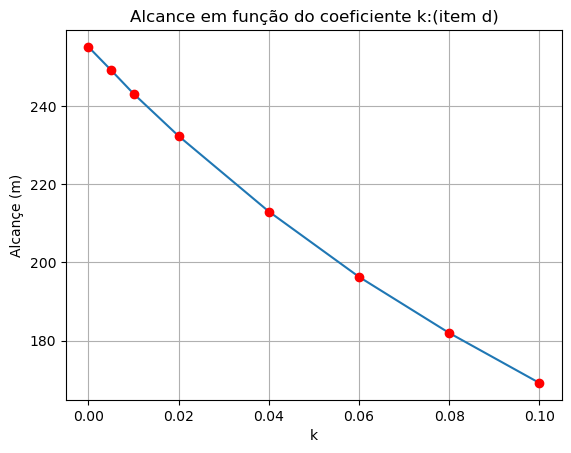

In [3]:

 
plt.plot(K,alcances)

plt.plot(K,alcances, 'o', color ="red")

plt.xlabel("k")
plt.ylabel("Alcançe (m)")
plt.title("Alcance em função do coeficiente k:(item d)")
plt.grid()
plt.show()

Os gráficos que descrevem o movimento de projéteis sob diferentes valores da constante de força de retardo $ k $ revelam padrões claros e fisicamente consistentes, destacando os efeitos da resistência do ar. Quando $ k = 0 $, a ausência de resistência resulta em uma trajetória parabólica clássica, com simetria entre a subida e a descida. A altura máxima é atingida no ponto médio do alcance horizontal, e o movimento segue as leis ideais da cinemática, onde o alcance máximo teórico é dado por: $R = \frac{v_0^2 \sin(2\theta)}{g}$

Essa simetria e previsibilidade, no entanto, são perturbadas à medida que $ k $ assume valores positivos.

Para $ k > 0 $, a resistência do ar introduz uma dissipação de energia que altera significativamente a dinâmica do projétil. A altura vertical máxima diminui progressivamente com o aumento de $ k $, uma vez que a força resistiva atua contra o movimento ascendente, reduzindo a energia cinética disponível para vencer a gravidade. Simultaneamente, o alcance horizontal também é encurtado, pois a resistência freia o projétil ao longo de toda a trajetória. As curvas deixam de ser parabólicas e tornam-se assimétricas, com a fase de descida mais abrupta que a de subida. Em valores elevados de $ k $ (como $ k = 0.1 $), o efeito é tão pronunciado que a trajetória se aproxima de um perfil quase vertical, limitando drasticamente tanto a altura quanto o alcance. Essas mudanças ilustram como a resistência do ar transforma um movimento idealizado em um cenário mais realista, onde forças dissipativas não podem ser ignoradas.

Ao analisar o alcance em função de $ k $, observa-se um decaimento não linear. Para valores pequenos de $ k $ (como $ k = 0.005 $), a redução do alcance é moderada, mas à medida que $ k $ aumenta, a queda torna-se mais acentuada. Por exemplo, para $ k = 0.1 $, o alcance aproxima-se de zero, indicando que a força resistiva domina completamente o movimento. Essa relação segue uma tendência exponencial ou logarítmica, coerente com a dependência da força de arrasto em relação à velocidade. A expressão:$R' \approx R \left(1 - \frac{4bv_0 \sin\theta}{3g}\right)$

derivada no estudo, reforça que a redução do alcance $ \Delta R $ é proporcional a $ k $, evidenciando a sensibilidade do sistema a essa constante.

Comparando esses resultados com o caso ideal ($ k = 0 $), fica evidente que a resistência do ar não apenas limita o alcance, mas também distorce a forma da trajetória. Enquanto no cenário sem resistência o movimento é totalmente determinado pelas condições iniciais de lançamento, a presença de $ k > 0 $ introduz uma complexidade adicional, tornando a trajetória dependente das propriedades do fluido e do objeto. Isso tem implicações práticas em áreas como balística, engenharia aeronáutica e esportes, onde a precisão das previsões exige a incorporação de forças não conservativas.

Fisicamente, os gráficos reforçam que a resistência do ar atua como um fator de amortecimento, cuja influência cresce com a velocidade e a constante $ k $. Valores elevados de $ k $ podem representar fluidos mais viscosos ou objetos com maior área superficial, situações em que o arrasto se torna predominante. Em casos extremos, o projétil praticamente não se desloca horizontalmente, caindo quase verticalmente após o lançamento. Esses comportamentos destacam a importância de modelos matemáticos que incluam forças dissipativas para descrever fenômenos reais com precisão.

Em síntese, os gráficos não apenas validam as equações teóricas, mas também oferecem uma visualização intuitiva de como a resistência do ar modifica o movimento de projéteis. Eles ilustram a transição entre um sistema idealizado e um sistema realista, onde a energia mecânica não é conservada, e reforçam a necessidade de considerar múltiplos fatores em simulações práticas. A análise dessas curvas é fundamental para aplicações que vão desde o projeto de veículos até a compreensão de fenômenos naturais, sublinhando a interação entre teoria e realidade.

### 5. Energia potencial

Uma partícula de massa 𝑚 se movimentando em uma dimensão tem energia potencial 

$$𝑈(𝑥)=𝑈_0\left[2(\frac{𝑥}{𝑎})^2−(\frac{𝑥}{𝑎})^4 \right], $$
onde $𝑈_0$ e 𝑎 são constantes positivas.

(a) Determine a força 𝐹(𝑥) atuando sobre a partícula.

(b) Faça um gráfico de 𝑈(𝑥). Determine as posições de equilíbrio estável e instável.

(c) Qual será a frequência angular 𝜔 das oscilações em torno do ponto de equilíbrio?

(d) Qual será a velocidade mínima que a partícula deverá ter na origem para escapar para o infinito?

(e) Em 𝑡=0, a partícula encontra-se na origem e sua velocidade é positiva e igual em magnitude à velocidade do item (d). Determine 𝑥(𝑡) e faça um gráfico do resultado.


**Solução analítica:**

#### a) Para determinar a força $F(x)$, usamos a relação:

$$ F(x) = - \frac{dU}{dx}. $$

Assim, derivando a expressão U(x) dada, e adicionando o sinal negativo temos:

$$ \frac{d}{dx}𝑈(𝑥) = 𝑈_0 \frac{d}{dx}\left[2(\frac{𝑥}{a})^2−(\frac{𝑥}{a})^4 \right] $$

$$ \frac{d}{dx}𝑈(𝑥) = \frac{4x𝑈_0}{a^2} \left[1 - \frac{x^2}{a^2}\right] $$

$$ \boxed{F(x) = \frac{4x𝑈_0}{a^2} \left[\frac{x^2}{a^2} - 1\right]}  $$

In [20]:
def pot(x):
    return u0*(2 * (x/a)**2 - (x/a)**4)

def forca(x):
    return ((4*x*u0)/a**2)*(x**2/a**2  - 1)

#### b) Plotando o gráfico de U(x)

Para encontrarmos os pontos de equilíbrio, igualaremos a derivada de $dU/dx = 0$. Vamos aproveitar a expressão encontrada em a), de forma que temos (em que fizemos $dU/dx = - F(x)$):

$$ 0 = \frac{4x𝑈_0}{a^2} \left[1 - \frac{x^2}{a^2}\right]. $$

Assim, as soluções de $x$ para essa equação nos dará as posições de equilíbrio. Então desenvolvemos:

$$ 4xU_0 - \frac{4x^3 U_0}{a^2} = 0 $$

$$ x \left( 4U_0 - \frac{4U_0 x^2}{a^2} \right) = 0.$$

Como a multiplicação dos dois é 0, temos duas situações: $x = 0$, ou o termo entre parênteses é nulo. Vamos abordar esse segundo agora.

$$ 4U_0\left( 1 - \frac{x^2}{a^2}\right) = 0 $$

$$ x^2 = a^2 \implies \boxed{x = \pm a}$$

Dessa forma, temos que os pontos de equilíbrio são $x = 0$ e $x = \pm a$. Agora nos resta encontrar se cada um desses é instável ou estável. Poderíamos abordar esse problema de forma analítica, encontrando a segunda derivada de $U(x)$ e vendo os sinais em cada ponto. Porém, para evitar uma síndrome de túnel do carpo, vou analisar o gráfico que plotamos: as posições $x = \pm a$ são pontos de **equilíbrio instável** (máximos da função); já o $x = 0$ é um ponto de **equilíbrio estável** (mínimo da função).

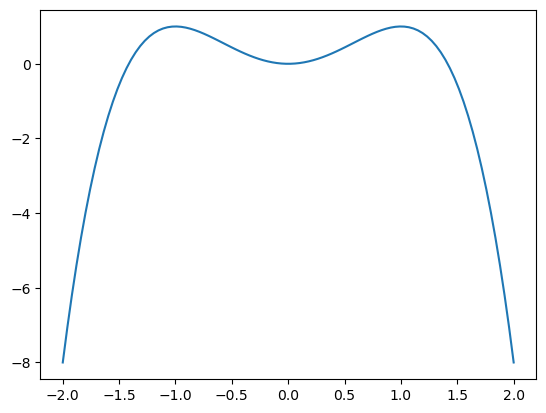

In [21]:
a = 1
u0 = 1
m = 1

x = np.linspace(-2,2,100)

plt.plot(x, pot(x))

#### c) valor de $\omega$

Para encontrar os valores de $\omega$, inicialmente vamos expandir $U(x)$ em série de Taylor ao redor do ponto de equilíbrio estável, $x = 0$. Nesse ponto, considerando oscilações pequenas, desprezando os termos de ordem maior que 2 temos:

$$ U(x) \approx U(x_0) + U'(x_0)(x - x_0) +  \frac{1}{2}U''(x_0)(x - x_0)^2 $$

Como discutido anteriormente $F(x) = - U'(x)$. Como estamos em um ponto de equilíbrio, a força deve ser nula de forma que $U'(x) = -F(x) = 0$. Podemos continuar o desenvolvimento então

$$ U(x) \approx U(0) + \frac{1}{2}U(0)''(x - 0)^2 $$

$$ U(x) \approx \frac{1}{2}U(0)''x^2$$

Chamando $ U''(0) = k $, $U(x)$ toma a forma do potencial de uma mola - que será o nosso oscilador harmônico simples -  e $k$ será exatamente nossa constante elástica.

$$ U(x) = \frac{1}{2}kx^2 $$

Como agora estamos tratando nosso problema como se fossem molas, sabemos que $\omega^2 = k/m$. Mas podemos explicitar essa igualdade através da segunda lei de Newton. Derivando, $U(x)$ para encontrarmos a força, nos deparamos com a Lei de Hooke:

$$ F(x) = - kx $$

Assim, aplicamos na segunda lei. E, desenvolvendo, chegamos na expressão para o oscilador harmonico simples. 

$$\sum F = m\ddot{x} = -kx$$

$$ m\ddot{x} = -kx \implies m\ddot{x} + kx = 0 $$

$$  \ddot{x} + \frac{k}{m}x = 0  \implies \ddot{x} + \omega_0^2x = 0   $$

Onde definimos $\omega_0^2 = k/m$, que é o que buscamos na questão. Então, como encontramos mais cedo que $U''(0) = k$, precisamos encontrar o valor de $U''(0)$ (segunda derivada) para podermos chegar em $\omega_0$. Dessa forma:


$$ \frac{d^2U}{dx^2} = U_0 \left( \frac{4}{a^2} - \frac{12x^2}{a^4} \right) $$

Avaliada em $( x = 0 )$:


$$ U''(0) = \frac{4U_0}{a^2}. $$

Assim, substituindo na expressão de $\omega$:

$$ \omega = \sqrt{\frac{U''(0)}{m}} = \sqrt{\frac{4U_0}{ma^2}} $$

$$\boxed{\omega = \frac{2}{a} \sqrt{\frac{U_0}{m}}}$$



#### d) Encontrar a velocidade mínima para escapar para o infinito (e além)

Para esse problema, utilizaremos o conceito de conservação de energia mecânica $\Delta E = \frac{1}{2}mv^2 + U = 0$. Analisando o sistema, temos que para a partícula conseguir escapar para o infinito, é necessário que vença o máximo do potencial que ocorre em $x \pm a$.

Primeiro encontramos o potencial em $x = a$:

$$ U(x) = U_0 \left[ 2\left(\frac{x}{a}\right)^2 - \left(\frac{x}{a}\right)^4 \right] $$

$$ U(a) = U_0 \left[ 2\left(\frac{a}{a}\right)^2 - \left(\frac{a}{a}\right)^4 \right] $$

$$ U(a) = U_0 (2 - 1) = U_0$$


Dessa forma, podemos equacionar:

$$\frac{1}{2}mv^2 + U(a) = 0$$

Já que queremos a velocidade mínima, fazemos uma desigualdade:

$$\frac{1}{2}mv^2 \geq U_0$$

$$ v^2 \geq \frac{2}{m}U_0$$

$$ v \geq \sqrt{\frac{2U_0}{m}}$$

De forma que a velocidade mínima para a partícula ir para chegar no máximo potencial é:

$$ \boxed{v_{min} = \sqrt{\frac{2U_0}{m}}}.$$


#### e) Determinar x(t) e elaborar o gráfico

O enunciado nos dá as condições iniciais $x(0) = 0$ (e consequentemente $U(0) = 0$), e $v(0) = v_{min}$ encontrada em d). Com isso, usaremos do conceito de conservação de energia. Para isso, vamos definir a energia mecânica da seguinte forma. Como estabelecemos a $v_{min}$ na questão anterior, sabemos que $v_{min}$ é suficiente para ficar na iminência de continuar o movimento no ponto máximo da função. Assim, podemos equacionar a energia nesse ponto com $v_a = 0$. Com isso, temos a energia mecânica como:

$$ \frac{1}{2} mv^2 + U(x) = U(a)$$

$$ \frac{1}{2} mv^2 = U(a) - U(x)$$

$$ v^2 = \frac{2}{m}\left( U(a) - U(x)\right) \implies v = \sqrt{\frac{2}{m}\left( U(a) - U(x)\right)}$$

Antes de prosseguir, podemos reescrever $v$ levando em conta as expressões de $U(x)$ dada no enunciado, a relação $U(a) = U_0$, e as condições iniciais. Levando isso em consideração, chegamos a

$$ v = \sqrt{ \frac{2U_0}{m} \left( 1 - 2\left(\frac{x}{a}\right)^2 + \left(\frac{x}{a}\right)^4 \right) }$$

$$ v = \sqrt{ \frac{2U_0}{m} \left[1 - \left( \frac{x}{a} \right)^2 \right]^2 }$$

$$ v = \left[1 - \left( \frac{x}{a} \right)^2 \right] \sqrt{ \frac{2U_0}{m} }$$


Assim, temos nossa expressão para $v$. Com isso, da mesma maneira que fizemos na questão 1, sabemos que $v = dx/dt$. E assim, podemos montar a integral:

$$ \frac{dx}{dt} = \left[1 - \left( \frac{x}{a} \right)^2 \right] \sqrt{ \frac{2U_0}{m} }$$


$$ \int_{0}^{x} \frac{1}{ 1 - \left( \frac{x}{a} \right)^2 } dx = \int_{0}^{t}  \left( \frac{2U_0}{m} \right)^{1/2} dt $$

Vemos que a integral em relação a $t$ é simples, enquanto a em relação a $x$ bem mais complexa. Por sorte, é uma integral tabelada da forma:

$$ \int \frac{dx}{1 - \left( \frac{x}{a} \right)^2} = a \tanh^{-1} \left( \frac{x}{a} \right) + C $$

Assim, resolvendo ambas as integrais:

$$ a \tanh^{-1} \left( \frac{x}{a} \right) = t\left( \frac{2U_0}{m} \right)^{1/2} $$

$$\boxed{x(t) = a \tanh \left[ \frac{t}{a} \left( \frac{2U_0}{m} \right)^{1/2} \right]}$$

E assim, encontramos a relação que descreve $x(t)$. Agora iremos gerar o gráfico dela.

In [22]:
# Definindo a expressão de x(t)

def x_t(t):
    return a * np.tanh((t / a) * np.sqrt(2 * u0 / m))


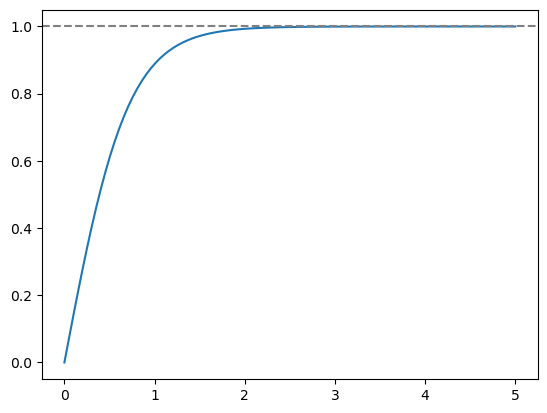

In [23]:
t = np.linspace(0,5,100)

plt.plot(t, x_t(t))
plt.axhline(a, ls = '--', c ='gray') 

O gráfico nos mostra o que era uma dúvida quando analisamos o gráfico. A $v_{min}$ é suficiente apenas para chegar ao topo do segundo potencial máximo, sem continuar o seu movimento além disso - por isso definimos $v_a = 0$. Ou seja, a expressão da velocidade mínima para a partícula partir para o infinito é

$$ \boxed{v_{min} > \sqrt{\frac{2U_0}{m}}}.$$


Já que a igualdade condiz com o ponto em que chega no ponto de equilíbrio e fica lá.


**Comentário final:** Nesse problema, estudamos a energia potencial de um sistema com uma partícula se movimentando em uma dimensão. A partir da expressão para $U(x)$, conseguimos encontrar analiticamente a força, e os pontos de equilíbrio da função $U(x)$ - em que sua estabilidade foi descoberta visualmente usando do gráfico. Para encontrar a frequência angular, consideramos oscilações pequenas em torno do ponto de equilíbrio estável ($x = 0$) de forma que, ao expandir em série de Taylor, encontramos a relação para o potencial de uma mola. Logo, aproximamos nosso sistema a uma mola (sistema harmônico simples), o que nos leva ao valor de $\omega$. Nas últimas duas alternativas acabamos calculando a velocidade necessária para a partícula chegar ao topo do máximo do potencial partindo da origem, ficando na iminência do movimento. Com isso, redefinimos a velocidade mínima para não incluir a igualdade.

### 6. Oscilador Harmônico Amortecido

---

**Enunciado:**

**Oscilador Harmônico Amortecido.**   
(a) Construa analiticamente um diagrama de fase geral para o oscilador amortecido.  
(b) A seguir, construa gráficos de ẋ versus x e (x, ẋ) versus t e um diagrama de fase para os valores A = 1 cm, ω₀ = 1 rad/s, β = 0.2 s⁻¹ e δ = π/2 rad.  
(c) Reproduza os gráficos do item (b) para os mesmos valores fornecidos, porém considere β = 0,1 s⁻¹ e δ = π rad.  
(d) Quantas vezes o sistema cruza a linha x = 0 antes de a amplitude finalmente cair abaixo de 10⁻² de seu valor máximo? Qual gráfico, ẋ versus x ou (x, ẋ) versus t, é mais útil para determinar este número? Explique.

---




**Item a) Solução analítica**


##### Equações do Movimento

O deslocamento $x(t)$ e a velocidade $\dot{x}(t)$ são dados por:


$$x(t) = Ae^{-\beta t} \cos(\omega_1 t - \delta)$$



$$\dot{x}(t) = -Ae^{-\beta t} \left[ \beta \cos(\omega_1 t - \delta) + \omega_1 \sin(\omega_1 t - \delta) \right]$$

---

##### Transformação de Variáveis

Para facilitar a visualização do diagrama de fase, fazemos a seguinte **mudança de variáveis lineares**:


$$u = \omega_1 x
\quad \text{e} \quad
w = \beta x + \dot{x}$$


Substituindo a expressão de $x(t)$ e $\dot{x}(t)$, obtemos:



$$u(t) = \omega_1 A e^{-\beta t} \cos(\omega_1 t - \delta)$$



$$w(t) = -\omega_1 A e^{-\beta t} \sin(\omega_1 t - \delta)$$


---

##### Representação em Coordenadas Polares

A partir das expressões acima, podemos escrever o raio $\rho$ e o ângulo $\phi$ da trajetória no plano de fase transformado $(u, w)$:


$$\rho(t) = \sqrt{u^2 + w^2} = \omega_1 A e^{-\beta t}$$



$$\phi(t) = \omega_1 t$$


---

##### Forma do Diagrama de Fase

A equação final da trajetória no plano de fase transformado é:


$$\rho(t) = \omega_1 A e^{-\frac{\beta}{\omega_1} \phi}$$


Essa é a equação de uma **espiral logarítmica**, que descreve como a trajetória no espaço de fase (x, $\dot{x}$) ou $(u, w)$ decai exponencialmente em direção ao centro com o passar do tempo.

---

##### Conclusão

O diagrama de fase para o oscilador harmônico amortecido, quando transformado para o plano $(u, w)$, assume a forma de uma espiral logarítmica, facilitando a análise do decaimento do sistema e sua dinâmica global.


#### Itens b) e c)

É importante salientar que para fazer um código, usarei as expressões dadas para x(t) e $\dot x$(t) dadas no item a). a partir disso será montado os gráficos. 

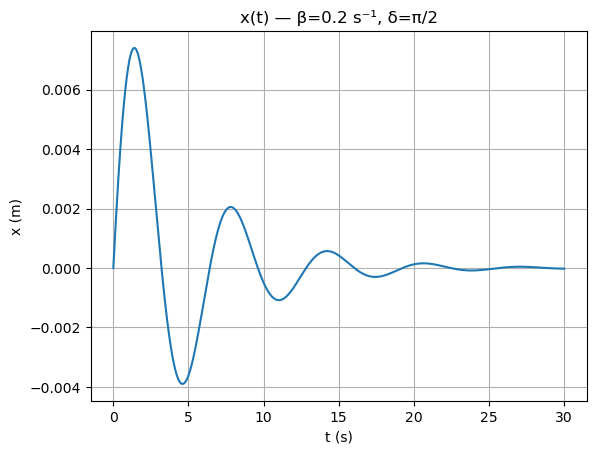

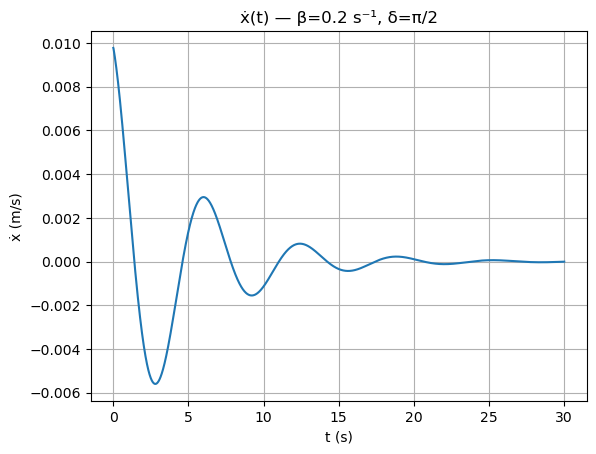

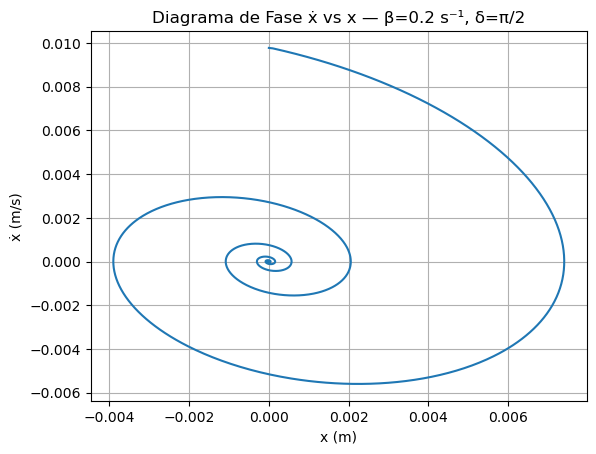

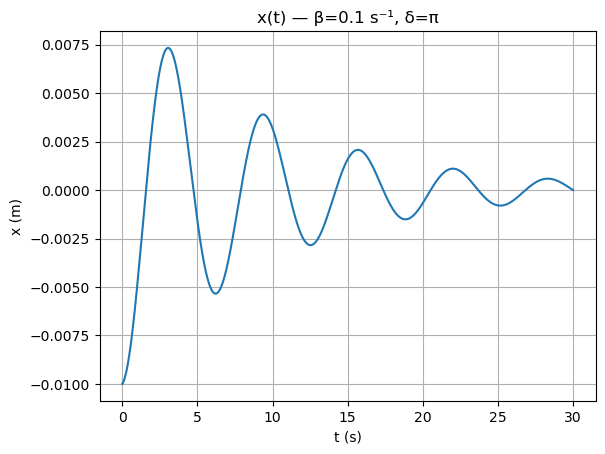

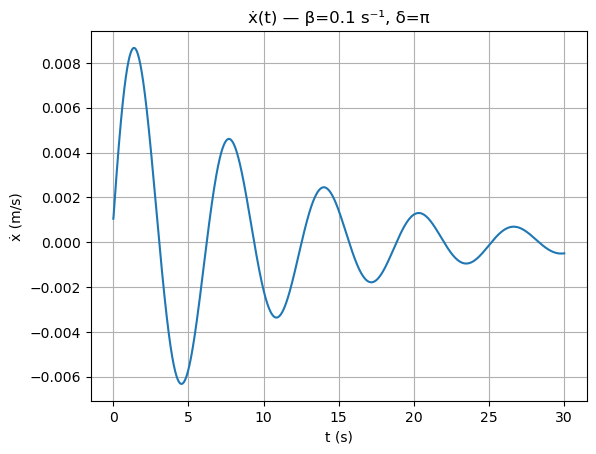

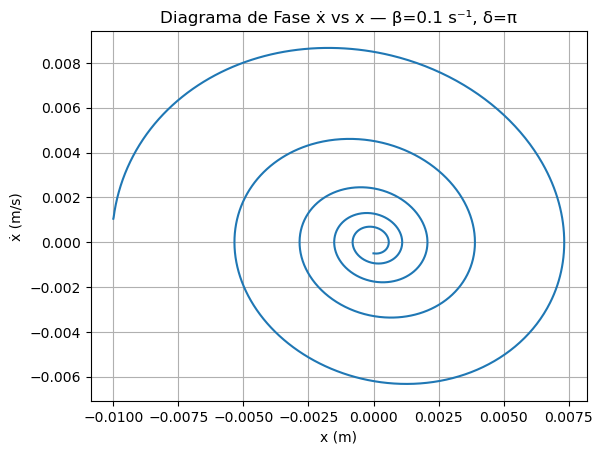

Número de cruzamentos de x=0 até |x| < 10⁻²A: 9 (Primeiro caso)
Número de cruzamentos de x=0 até |x| < 10⁻²A: 10 (Segundo caso)


In [3]:
#função para o oscilador 
def Função_oscilador(A, omega0, beta, delta, t_max=30, dt=0.01):
    t = np.arange(0, t_max + dt, dt)
    omega1 = np.sqrt(omega0**2 - beta**2)
    x = A * np.exp(-beta * t) * np.cos(omega1 * t - delta)
    xdot = np.gradient(x, dt)
    return t, x, xdot

# valores pedidos na questão!
params = [
    (0.01, 1.0, 0.2, np.pi/2, 'β=0.2 s⁻¹, δ=π/2'),
    (0.01, 1.0, 0.1, np.pi,   'β=0.1 s⁻¹, δ=π')
]

# Função que gera os gráficos para facilitar o plot
for A, omega0, beta, delta, label in params:
    t, x, xdot = Função_oscilador(A, omega0, beta, delta)
    
    # x vs t
    plt.figure()
    plt.plot(t, x)
    plt.title(f'x(t) — {label}')
    plt.xlabel('t (s)')
    plt.ylabel('x (m)')
    plt.grid(True)
    plt.show()
    
    # ẋ vs t
    plt.figure()
    plt.plot(t, xdot)
    plt.title(f'ẋ(t) — {label}')
    plt.xlabel('t (s)')
    plt.ylabel('ẋ (m/s)')
    plt.grid(True)
    plt.show()
    
    # Diagrama de fase
    plt.figure()
    plt.plot(x, xdot)
    plt.title(f'Diagrama de Fase ẋ vs x — {label}')
    plt.xlabel('x (m)')
    plt.ylabel('ẋ (m/s)')
    plt.grid(True)
    plt.show()

# Contagem de cruzamento x=0 para o primeiro caso (β=0.2, δ=π/2)
t, x, _ = Função_oscilador(0.01, 1.0, 0.2, np.pi/2)
zero_crossings = np.where(np.diff(np.sign(x)) != 0)[0]
num_crossings = len(zero_crossings)

# Contagem de cruzamento x=0 para o primeiro caso (β=0.1, δ=π)
t, x, _ = Função_oscilador(0.01, 1.0, 0.1, np.pi)
zero_crossings1 = np.where(np.diff(np.sign(x)) != 0)[0]
num_crossings1 = len(zero_crossings1)


print('Número de cruzamentos de x=0 até |x| < 10⁻²A:', num_crossings,"(Primeiro caso)")

print('Número de cruzamentos de x=0 até |x| < 10⁻²A:', num_crossings1,"(Segundo caso)")

**Item d)**

- **Número de cruzamentos de \(x=0\)**  
  Para os parâmetros $A=1$ cm, $\omega_0=1$ rad/s, $\beta=0{,}2$ s$^{-1}$ e $\delta=\tfrac\pi2$, o sistema cruza a linha $x=0$  **9 vezes** e para os parâmetros $A=1$ cm, $\omega_0=1$ rad/s, $\beta=0{,}1$ s$^{-1}$ e $\delta=\pi$ o sistema cruza **10 vezes** antes de a amplitude decair abaixo de $10^{-2}A$.

- **Gráfico mais útil**  
  O gráfico **$x(t)$ versus $t$** e **$\dot x(t)$ versus $t$** são os mais diretos para contar cruzamentos, pois cada troca de sinal de $x$ ao longo do eixo do tempo corresponde exatamente a um cruzamento em $x=0$.  
  Embora o diagrama de fase $(\dot x$ versus $x$) também mostre essas passagens pelo eixo $x=0$, ele não facilita a contagem sequencial ao longo do tempo.


### 7. Movimento Subamortecido

$\quad$ A equação que descreve a oscilação de um sistema subamortecido é

---
**Enunciado**: Elabore um gráfico de 𝑥(𝑡) da equação 𝑥(𝑡) = 𝐴𝑒 −𝛽𝑡 cos(𝜔1𝑡 − 𝛿) com 𝐴 = 1,0 m e de seus dois componentes [𝑒 −𝛽𝑡 e cos(𝜔1𝑡 − 𝛿)] e das comparações com 𝛽 = 0. Considere rad/s e elabore gráficos separados para 𝛽 2 𝜔0 2 = 0.1, 0.5 e 0.9 e para 𝛿 (em radianos) = 0, 𝜋 2 e 𝜋. Inclua somente um valor de 𝛿 e 𝛽 em cada gráfico (isto é, nove gráficos). Discuta os resultados.


---


$$ x(t) = Ae^{-\beta t}\cos{(\omega_1 t - \delta)},$$

onde $\phi$ é uma fase qualquer e $\omega_1 = \sqrt{\omega_0^2-\beta^2}$, com $\omega_0$ sendo a frequência característica e $\beta$ o fator de amortecimento. 

$\quad$ Consideraremos $\omega_0 = 1 rad/s$, de tal forma que

$$\frac{\beta^2}{\omega_0^2} = a \implies \beta = \sqrt{\omega_0^2 a} \implies \beta = \sqrt{a}.$$

Para o problema em questão, $a$ asssume os valores 0.1, 0.5 e 0.9.

$\quad$ Constantes

In [31]:
A = 1.0
omegazero = 1
deltas = [0, np.pi/2, np.pi]
razao = [0.1, 0.5, 0.9]

$\quad$ Função

In [32]:
def x(t,beta,omega1,delta):
    return A*np.exp(-beta*t)*np.cos(omega1*t-delta) 

$\quad$ Plotagem

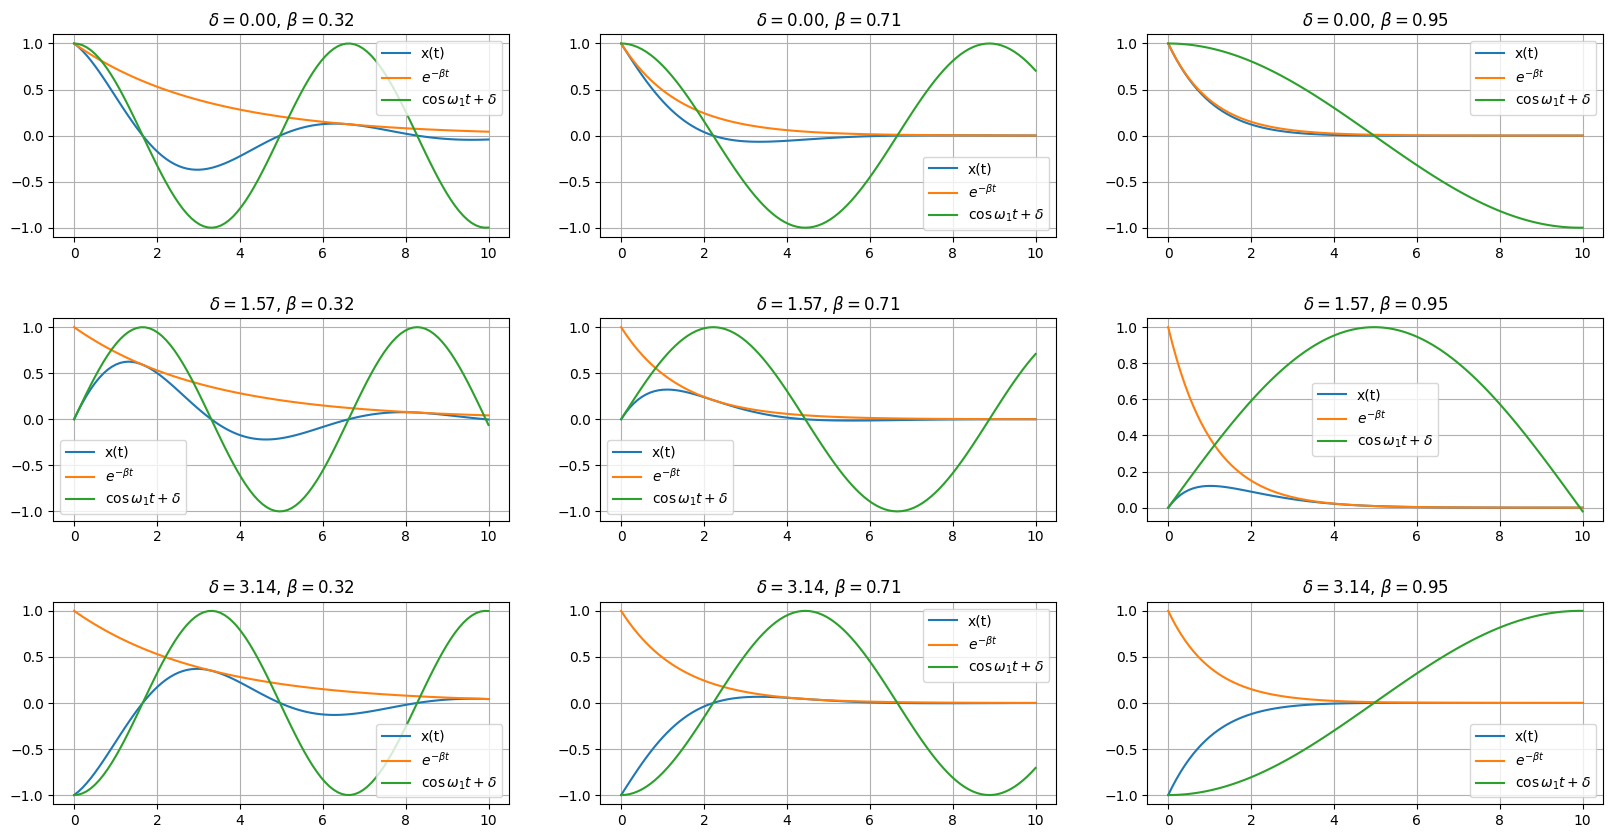

In [33]:
ti = 0 # Tempo inicial.
tf = 10 # Tempo final.
tempos = np.linspace(ti,tf,100) # Grade temporal.

fig, axes = plt.subplots(3, 3, figsize=(20, 10))

a = 0 # Para a enumeração dos plots.
for delta in deltas:
    o = 0 #Para a enumeração dos plots.
    for r in razao: 
        beta = omegazero*np.sqrt(r)
        omega1 = np.sqrt(omegazero**2 - beta**2) 

        x_points = []
        exponencial = []
        cosseno = []
        for i in range(len(tempos)):
            xi = x(tempos[i], beta, omega1, delta)
        
            x_points.append(xi)
            exponencial.append(np.exp(-beta*tempos[i]))
            cosseno.append(np.cos(omega1*tempos[i] - delta))

        axes[a][o].plot(tempos,x_points, label = r'x(t)')
        axes[a][o].plot(tempos,exponencial, label = r'$e^{-\beta t}$')
        axes[a][o].plot(tempos,cosseno, label = r'$\cos{\omega_1 t + \delta}$')
        axes[a][o].set_title(fr'$\delta = {delta:.2f}$, $\beta = {beta:.2f}$')
        axes[a][o].grid()
        axes[a][o].legend()
        o+=1
    a+=1

plt.subplots_adjust(hspace=0.4)
plt.show()

$\quad$ Para cada valor da fase $\delta$ (cada linha de gráfico), percebemos que ao aumentar o valor de $\beta$, do coeficiente de amortecimento, o sistema é forçado a encerrar sua oscilação de maneira mais rápida. Isto é, para valores não tão grandes de $\beta$, o sistema ainda tem tempo de realizar uma oscilação (amortecida, com amplitude decerescente com o tempo). Contudo, no caso de um $\beta$ muito grande, a amplitude de oscilação do sistema rapidamente cai a zero. Tal efeito ocorre de maneira semeslhante independente de qual seja o valor de $\delta$.

### 8. Oscilador Senoidal Impelido e Amortecido I

---
**Enunciado**: Elabore gráficos de 𝑥𝑝(𝑡), 𝑥𝑐(𝑡) e a soma 𝑥(𝑡) para um oscilador senoidal impelido e amortecido. Considere 𝛽 = 0.2 s −1 , 𝑘 = 1 kg/s 2 e 𝑚 = 1 kg

a) Produza esses gráficos para valores de 𝜔/𝜔1, iguais a 1 9 , 1 3 , 1.1, 3 e 6

b) Para a solução 𝑥𝑐(𝑡), 𝑥(𝑡) = 𝐴𝑒 −𝛽𝑡 cos(𝜔1𝑡 − 𝛿), considere o ângulo de fase 𝛿 = 0 e a amplitude 𝐴 = 1 m/s 2 . 

c) Para a solução 𝑥𝑝 (𝑡), 𝑥𝑝(𝑡) = 𝐴 √(𝜔0 2−𝜔2) 2 +4𝜔2𝛽2 cos(𝜔𝑡 − 𝛿), considere 𝐴 = 1 m/s 2 , mas calcule 𝛿.

d) O que se observa em relação às amplitudes relativas das duas soluções à medida que 𝜔 aumenta? Por que isto ocorre? (e) Para 𝜔/𝜔1, considere 𝐴 = 20 m/s 2 para 𝑥𝑝(𝑡) e produza o gráfico novamente.

---

$\quad$ A solução geral para o caso de uma oscilação sobreamortecida é:

$$ x(t) = x_c(t) + x_p(t) ,$$

onde $x_c(t)$ é a solução da EDO (falar qual EDO?!) homogenea e $x_p(t)$ é a solução para o caso particular. É importante entender que $x_c(t)$ descreve com mais peso o comportamento da função $x(t)$ para valores de $t < \frac{1}{\beta}$. Já para $t>>\frac{1}{\beta}$, $x_p(t)$ passa a determinar como a função se comporta. Explicitamente, teremos

$$ x_p(t) = \frac{A}{\sqrt{\left( \omega_0^2 - \omega^2 \right) + 4\omega^2 \beta^2}}\cos{\left(\omega t - \tg^{-1} \left( \frac{2\omega \beta}{\omega_0^2 -\omega^2} \right)\right)}$$

e

$$ x_c(t) = e^{-\beta t}\cos{(\omega_1 t - \delta)}.$$

a)

 $\quad$ Nos é fornecidos os valores das constantes: $\beta = 1s^{-1}$, $k = 1 kg/s^2$ e $m=1kg$, de onde já podemos tirar que $\omega_0 = \sqrt{\frac{k}{m}} = \sqrt{\frac{1}{1}} = 1.$ Além disso, teremos que

$$\frac{\omega}{\omega_1} = \frac{1}{9}, \frac{1}{3}, \frac{11}{10}, 3, 6 \implies \omega_1 = 9, 3, \frac{10}{11}, \frac{1}{3}, \frac{1}{6}.$$ 

Defindo essas cosntantes

In [34]:
beta = 0.2
omegas1 = [9, 3, 10/11, 1/3, 1/6]
omega0 = 1
# supor
A = 1
delta = 0
omega = 1

In [35]:
def xc(t):    
    return A*np.exp(-beta*t)*np.cos(omega1*t)

def xp(t):
    delta = np.arctan((2*omega*beta)/(omega0**2 - omega**2))
    return A*(np.cos(omega*t-delta))/(np.sqrt((omega0**2 - omega**2)**2+(4*omega**2*beta**2)))

def x(t):
    return xc(t) + xp(t)

In [36]:
# tempos = np.linspace(0,15,100)

# x_c = []
# x_p = []
# xs = []

# for t in tempos:
#     x_c.append(xc(t))
#     x_p.append(xp(t))
#     xs.append(x(t))


# plt.plot(tempos, x_c, "g")
# plt.plot(tempos, x_p, "r")
# plt.plot(tempos, xs, "b")
# plt.show()


### 9. Oscilador Senoidal Impelido e Amortecido II

---
**Enunciado**: elabore gráficos de 𝑥𝑝(𝑡), 𝑥𝑐(𝑡) e a soma 𝑥(𝑡) para um oscilador senoidal impelido e amortecido. Considere os valores 𝛽 = 1 s −1 , 𝑘 = 1 kg/s 2 e 𝑚 = 1 kg.

a) Produza esses gráficos para valores de 𝜔/𝜔1, iguais a 1 9 , 1 3 , 1.1, 3 e 6.

b) Para a solução criticamente amortecida, 𝑥(𝑡) = (𝐴 + 𝐵𝑡)𝑒 −𝛽𝑡, considere 𝛿 = 0, 𝐴 = −1 m e 𝐵 = 1 m/s.

c) Para a solução 𝑥𝑝(𝑡), 𝑥𝑝(𝑡) = 𝐴 √(𝜔0 2−𝜔2) 2 +4𝜔2𝛽2 cos(𝜔𝑡 − 𝛿), considere 𝐴 = 1 m/s 2 e calcule 𝛿.

d) O que se observa em relação às amplitudes relativas das duas soluções à medida que 𝜔 aumenta? Por que isto ocorre?

e) Para 𝜔 𝜔1 = 6, considere 𝐴 = 20 m/s 2 para 𝑥𝑝(𝑡) e produza o gráfico novamente.

---

### 10. Oscilador Amortecido e a Função de Green.

---

**Enunciado:**
 
a) Faça um gráfico da amplitude de ressonância 𝐴 versus a razão de frequência 𝜔/𝜔0 para diferentes valores de 𝛾.

b) Faça um gráfico da variação do ângulo de fase 𝜙 versus a razão de frequência 𝜔/𝜔0.

c) Qual é o efeito do uso de valores de 𝛾 maiores que 1 em (a) e menores que 1 em (b).

---

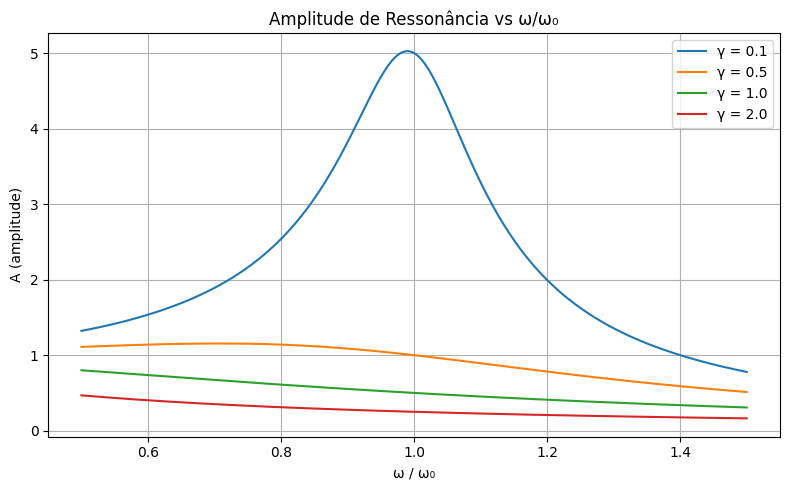

In [37]:
# Frequência natural
w0 = 1.0

# Frequências normalizadas: omega / omega_0
w_ratio = np.linspace(0.5, 1.5, 500)
w = w_ratio * w0

# Valores de amortecimento gamma
gammas = [0.1, 0.5, 1.0, 2.0]

# Plot
plt.figure(figsize=(8, 5))
for gamma in gammas:
    A = 1 / np.sqrt((w0**2 - w**2)**2 + (2 * gamma * w)**2)
    plt.plot(w_ratio, A, label=f'γ = {gamma}')

plt.title('Amplitude de Ressonância vs ω/ω₀')
plt.xlabel('ω / ω₀')
plt.ylabel('A (amplitude)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
